<a href="https://colab.research.google.com/github/stan587/Data-Science-Portfolio/blob/master/Time_Series_Oil_Price_Forecast/Time_Series_Forecast_of_Brent_and_WTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecast of Brent and WTI

Stan Chen

Last Update: 
*Jan 4th, 2019 (Updated due to a major driving force change: US-Iran Incident)*


---
### Introduction
This project is created to showcase the possibilities of performing time-series market prediction with Python scripts. Python is a general purpose programming language which in this case I'm using it to train a time series predictive models. 


### Why use this python procedure to perform this process?

While it's nice to use specialized software such as SAS or IBM SPSS, licensing these softwares could be expensive. With properly constructed data pipeline and well-written logic, a simple python script can be as effective as specialized software solutions. 

---
### Processes involved in this project:
1. Data Ingestion
2. Time series modeling
3. Perform prediction using trained models
---

###  CRISP-DM Framework
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment


Data source:
https://datahub.io/core/oil-prices#python



# Data Ingestion

In [1]:
# !pip install datapackage
from datapackage import Package
import matplotlib.pyplot as plt 
import pandas as pd
import io


dp_url='https://datahub.io/core/oil-prices/datapackage.json'
dp = Package(dp_url)

# print list of all resources:
print(dp.resource_names)

# # print processed tabular data (if exists any)
# for resource in dp.resources:
#     if resource.descriptor['datahub']['type'] == 'derived/csv':
#         print(resource.read())



[u'validation_report', u'brent-daily_csv', u'brent-weekly_csv', u'brent-monthly_csv', u'brent-annual_csv', u'wti-daily_csv', u'wti-weekly_csv', u'wti-monthly_csv', u'wti-annual_csv', u'brent-daily_json', u'brent-weekly_json', u'brent-monthly_json', u'brent-annual_json', u'wti-daily_json', u'wti-weekly_json', u'wti-monthly_json', u'wti-annual_json', u'oil-prices_zip', u'brent-daily_csv_preview', u'wti-daily_csv_preview', u'brent-daily', u'brent-weekly', u'brent-monthly', u'brent-annual', u'wti-daily', u'wti-weekly', u'wti-monthly', u'wti-annual']


In [2]:
# to load only tabular data
src1=dp.get_resource('brent-daily_csv').read(keyed=True)
src2=dp.get_resource('wti-daily_csv').read(keyed=True)

In [3]:
# Loading the data into a Panda dataframe
# df1_bre : Data Frame for Brent
#print(src1)
df1_bre=pd.DataFrame(src1)
# df2_wti : Data Frame for WTI
df2_wti=pd.DataFrame(src2)

# Visualizing Data

/home/unix_user/.local/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


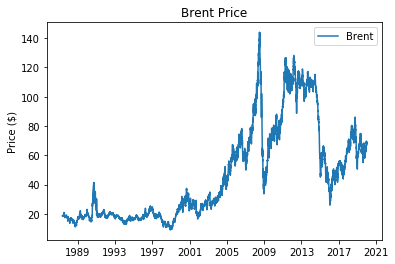

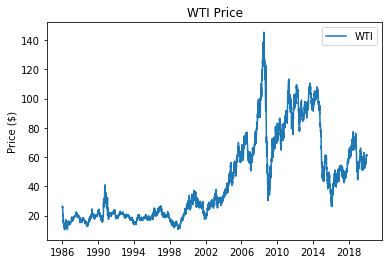

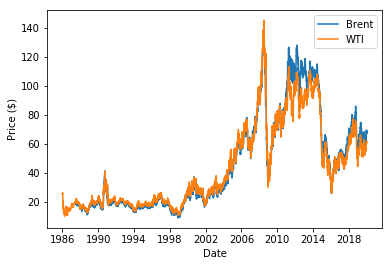

In [4]:
plt.plot(df1_bre['Date'], df1_bre['Price'], label = 'Brent')
plt.title('Brent Price')
plt.ylabel('Price ($)');
plt.legend();
plt.show()

plt.plot(df2_wti['Date'], df2_wti['Price'], label = 'WTI')
plt.title('WTI Price')
plt.ylabel('Price ($)');
plt.legend();
plt.show();

plt.plot(df1_bre['Date'], df1_bre['Price'], label = 'Brent')
plt.plot(df2_wti['Date'], df2_wti['Price'], label = 'WTI')
plt.xlabel('Date');
plt.ylabel('Price ($)');
plt.legend();
plt.show();

# Modeling & Forecasting
While there are several viable options to choose from Prophet, ARIMA, LTMS & other algorithms, in this case we're using Prophet.

In [5]:
# !pip install fbprophet


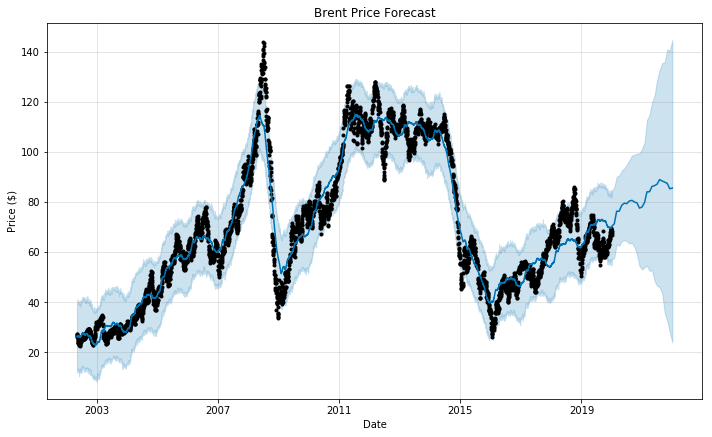

In [6]:
import fbprophet
# Prophet requires columns ds (Date) and y (value)
df1_bre = df1_bre.rename(columns={'Date': 'ds', 'Price': 'y'})
# bre_pp = fbprophet.Prophet(changepoint_prior_scale=1)
bre_pp = fbprophet.Prophet(changepoint_prior_scale=0.05,n_changepoints=100,interval_width=0.95,daily_seasonality=False,weekly_seasonality=True,yearly_seasonality=True,uncertainty_samples=1000)


# bre_pp.add_seasonality(name='weekly', period=7, fourier_order=4)
# bre_pp.add_seasonality(name='monthly', period=30.5, fourier_order=4)
# bre_pp.add_seasonality(name='yearly', period=365, fourier_order=1)
# bre_pp.daily_seasonality=True

bre_pp.fit(df1_bre[3800:])

# Make a future dataframe for 2 years
bre_forecast = bre_pp.make_future_dataframe(periods=12 * 2, freq='M')

# Make predictions
bre_forecast = bre_pp.predict(bre_forecast)

# Plot Projection
bre_pp.plot(bre_forecast, xlabel = 'Date', ylabel = 'Price ($)', uncertainty = True)
plt.title('Brent Price Forecast');

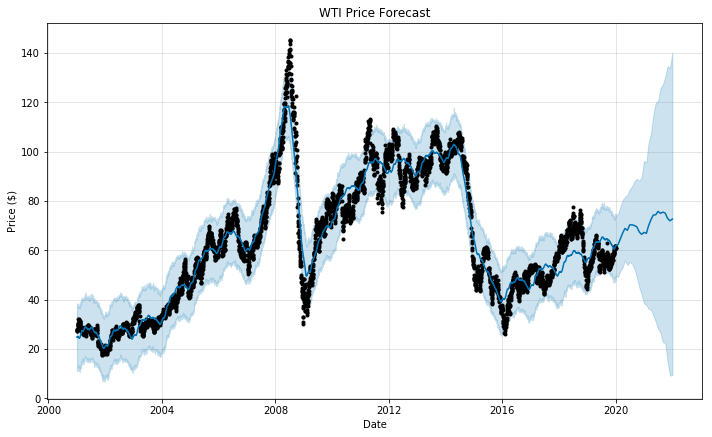

In [7]:
df2_wti = df2_wti.rename(columns={'Date': 'ds', 'Price': 'y'})
# wti_pp = fbprophet.Prophet(changepoint_prior_scale=1)
wti_pp = fbprophet.Prophet(changepoint_prior_scale=0.05, n_changepoints=100,interval_width=0.95,daily_seasonality=False,weekly_seasonality=True,yearly_seasonality=True,uncertainty_samples=1000)
# wti_pp.add_seasonality(name='weekly', period=7, fourier_order=4)
# wti_pp.add_seasonality(name='monthly', period=30.5, fourier_order=4)
# wti_pp.add_seasonality(name='yearly', period=365, fourier_order=1)
# wti_pp.daily_seasonality=True

wti_pp.fit(df2_wti[3800:])

# Make a future dataframe for 2 years
wti_forecast = wti_pp.make_future_dataframe(periods=12 * 2, freq='M')

# Make predictions
wti_forecast = wti_pp.predict(wti_forecast)


# Plot Projection
wti_pp.plot(wti_forecast, xlabel = 'Date', ylabel = 'Price ($)', uncertainty = True)
plt.title('WTI Price Forecast');

# Plotting Trends and patterns


Brent Forecast Trends and Patterns:


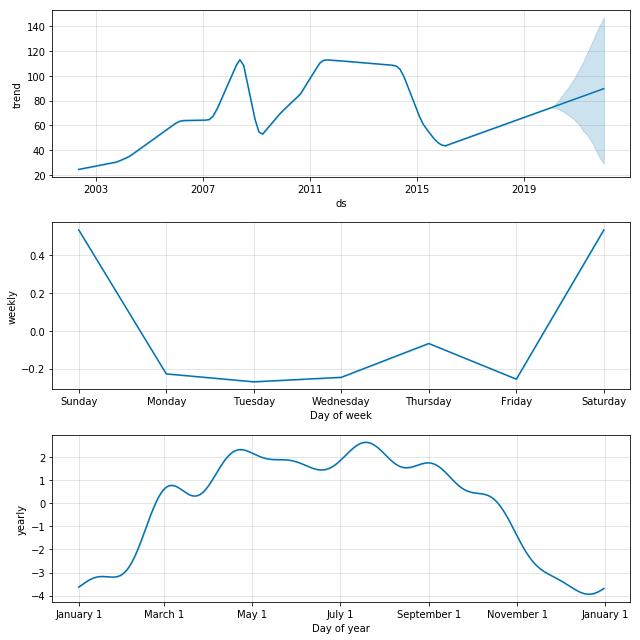

In [8]:
print("Brent Forecast Trends and Patterns:")
bre_pp.plot_components(bre_forecast, uncertainty = True);



WTI Forecast Trends and Patterns:


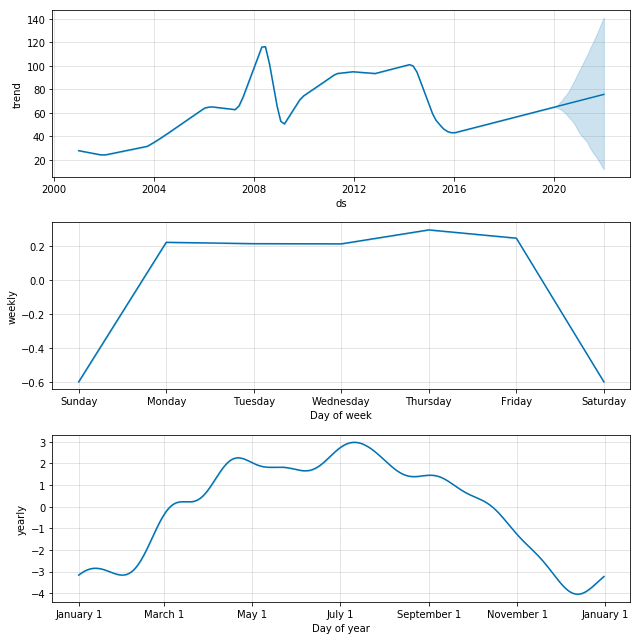

In [9]:
print("WTI Forecast Trends and Patterns:")
wti_pp.plot_components(wti_forecast, uncertainty = True);

In [10]:
bre_forecast.to_csv('bre_forecastOutput2.csv')
wti_forecast.to_csv('wti_forecastOutput2.csv')
bre_forecast


ds      trend  trend_lower  trend_upper  yhat_lower  yhat_upper  \
0    2002-05-09  24.469701    24.469701    24.469701   12.222143   39.751165   
1    2002-05-10  24.481075    24.481075    24.481075   12.879623   40.467291   
2    2002-05-13  24.515197    24.515197    24.515197   12.152472   39.791954   
3    2002-05-14  24.526571    24.526571    24.526571   12.761478   40.689262   
4    2002-05-15  24.537945    24.537945    24.537945   11.803973   39.269884   
5    2002-05-16  24.549319    24.549319    24.549319   12.320765   41.143196   
6    2002-05-17  24.560693    24.560693    24.560693   12.336465   39.321450   
7    2002-05-20  24.594816    24.594816    24.594816   12.818750   39.899446   
8    2002-05-21  24.606190    24.606190    24.606190   13.516757   40.721954   
9    2002-05-22  24.617564    24.617564    24.617564   12.832769   39.523611   
10   2002-05-23  24.628938    24.628938    24.628938   12.877619   40.023506   
11   2002-05-24  24.640312    24.640312    24.640312   12.625538   39.503019   
12   2002-05-27  24.674434    24.674434    24.674434   12.731416   39.923979   
13   2002-05-28  24.685808    24.685808    24.685808   13.361113   39.389274   
14   2002-05-29  24.697182    24.697182    24.697182   12.836904   39.703942   
15   2002-05-30  24.708556    24.708556    24.708556   12.644070   40.094233   
16   2002-05-31  24.719930    24.719930    24.719930   12.116098   40.325907   
17   2002-06-05  24.776800    24.776800    24.776800   10.348532   40.311735   
18   2002-06-06  24.788174    24.788174    24.788174   12.199054   40.352432   
19   2002-06-07  24.799548    24.799548    24.799548   11.993756   40.082886   
20   2002-06-10  24.833671    24.833671    24.833671   12.539695   39.020767   
21   2002-06-11  24.845045    24.845045    24.845045   12.052022   40.051978   
22   2002-06-12  24.856419    24.856419    24.856419   13.024068   38.228368   
23   2002-06-13  24.867793    24.867793    24.867793   13.557209   40.539167   
24   2002-06-14  24.879167    24.879167    24.879167   12.236202   40.679450   
25   2002-06-17  24.913289    24.913289    24.913289   11.884470   39.207116   
26   2002-06-18  24.924663    24.924663    24.924663   12.783868   40.330616   
27   2002-06-19  24.936037    24.936037    24.936037   12.240673   40.132516   
28   2002-06-20  24.947411    24.947411    24.947411   12.568282   38.685233   
29   2002-06-21  24.958785    24.958785    24.958785   12.814509   39.730521   
...         ...        ...          ...          ...         ...         ...   
4475 2019-12-23  73.865196    73.865196    73.865196   57.501344   84.871068   
4476 2019-12-24  73.886467    73.886467    73.886467   55.768969   83.845247   
4477 2019-12-27  73.950281    73.950281    73.950281   56.501531   84.206663   
4478 2019-12-30  74.014094    74.014094    74.014094   54.692718   83.797376   
4479 2019-12-31  74.035366    74.035366    74.035366   56.253865   82.197704   
4480 2020-01-02  74.077908    74.077908    74.077908   56.952212   84.480067   
4481 2020-01-31  74.694772    74.182825    75.221664   57.722175   85.982958   
4482 2020-02-29  75.311637    74.017180    76.805435   63.168533   90.157039   
4483 2020-03-31  75.971044    73.585233    78.745990   62.522574   90.718160   
4484 2020-04-30  76.609180    72.835238    80.840116   64.371683   92.645275   
4485 2020-05-31  77.268586    71.793243    83.272395   64.861206   93.597107   
4486 2020-06-30  77.906722    70.939773    85.668802   64.314323   95.024393   
4487 2020-07-31  78.566129    69.687755    88.244762   63.485012   96.758277   
4488 2020-08-31  79.225536    68.387335    90.551590   63.737112   98.674471   
4489 2020-09-30  79.863672    67.109764    93.029942   62.035322   98.975980   
4490 2020-10-31  80.523079    65.736704    95.941073   59.035278   99.462483   
4491 2020-11-30  81.161214    64.025110    98.711393   54.470457   99.495500   
4492 2020-12-31  81.820621    62.114494   102.257417   53.082507  101.320647   
4493 2021-01-

In [11]:
print(bre_forecast[:50])
print(df1_bre[:50])

           ds      trend  trend_lower  trend_upper  yhat_lower  yhat_upper  \
0  2002-05-09  24.469701    24.469701    24.469701   12.222143   39.751165   
1  2002-05-10  24.481075    24.481075    24.481075   12.879623   40.467291   
2  2002-05-13  24.515197    24.515197    24.515197   12.152472   39.791954   
3  2002-05-14  24.526571    24.526571    24.526571   12.761478   40.689262   
4  2002-05-15  24.537945    24.537945    24.537945   11.803973   39.269884   
5  2002-05-16  24.549319    24.549319    24.549319   12.320765   41.143196   
6  2002-05-17  24.560693    24.560693    24.560693   12.336465   39.321450   
7  2002-05-20  24.594816    24.594816    24.594816   12.818750   39.899446   
8  2002-05-21  24.606190    24.606190    24.606190   13.516757   40.721954   
9  2002-05-22  24.617564    24.617564    24.617564   12.832769   39.523611   
10 2002-05-23  24.628938    24.628938    24.628938   12.877619   40.023506   
11 2002-05-24  24.640312    24.640312    24.640312   12.625538  

# Changepoint Reports

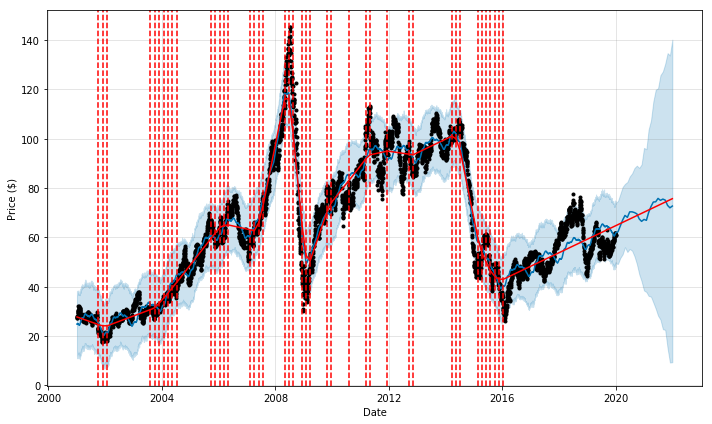

In [12]:
from fbprophet.plot import add_changepoints_to_plot
fig = wti_pp.plot(wti_forecast, xlabel = 'Date', ylabel = 'Price ($)', uncertainty = True)
a = add_changepoints_to_plot(fig.gca(), wti_pp, wti_forecast)

### References:

https://pypi.org/project/datapackage/#resource

https://datahub.io/docs/getting-started/getting-data

https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a

https://towardsdatascience.com/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python-6ceee9c6c651


https://www.tensorflow.org/tutorials/structured_data/time_series